## HDFC Uses its Workforce Analytics to Improve Loan Operations?

**About Dataset**

Let’s Inspect our Customer Loan Data. This dataset offers an overview of loan agreements, showcasing essential details like customer information, loan specifics, and associated sales personnel. It reveals uniform loan conditions, such as interest rates and scheme codes, across various agreements. The involvement of multiple dealers and a consistent focus on the Hyderabad region highlight the localized nature of these financial transactions.

Additionally, the dataset illustrates the organization's structured approach to loan processing and sales management, providing insights into its operational focus and market strategy.

**Objective :** 

Enhance workforce efficiency and performance in the loan management department to optimize resource utilization and drive business growth. This objective aims to improve sales manager productivity, streamline loan processing, and recognize top performers. By implementing targeted training programs and performance evaluations, we seek to achieve measurable improvements in loan disbursal rates and customer satisfaction within the next quarter.

**Goals :**

Efficiently improve sales manager performance, streamline loan processing workflows, and recognize top performers to enhance customer satisfaction and drive business growth. These objectives aim to optimize resource utilization and achieve measurable improvements in loan disbursal rates and customer conversion within the next quarter.

**Features**

- **Customer:** Name of the customer.
- **Agreement No:** Unique identifier for the loan agreement.
- **App ID:** Application identification number.
- **Loan Amount:** The total amount of loan approved.
- **Tenure:** Duration of the loan in months.
- **Disbursed Amount:** The amount of loan disbursed.
- **Disbursed Variation:** Variation in the disbursed amount from the approved loan amount.
- **Loan Date:** Date when the loan was disbursed.
- **ROI:** Rate of interest for the loan.
- **Dealer:** The dealer or agency through which the loan was processed.
- **Scheme Code:** A code representing the loan scheme.
- **Sales Rep:** Name of the sales representative.
- **Sales Manager:** Name of the sales manager overseeing the transaction.
- **City:** City where the customer is located.
- **Region:** Region where the customer is located.

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('Dataset/customer_loan_data.csv.csv')

In [3]:
# Show Top 5 Records

data.head()

,customer,agreement_no,app_id,city,region,roi,dealer,tenure,disb_amount,scheme_code,remarks,loan_amt,disb_var,sales_rep,sales_manager,dt_loan
0,Chandranagraaj Vasamsetti,TL011,12198,Hyderabad,Telangana,11.99,Velocity Motors,30,74090,41,No Remark,75000,910,Aarav Malhotra,Aarav Sharma,2023-08-23
1,Swapnil Nana Lande,TL012,12204,Hyderabad,Telangana,11.99,Auto Avenue,30,61790,41,No Remark,62700,910,Aarav Malhotra,Aarav Sharma,2020-10-27
2,Syeda Meraj Unnisa,TL013,12356,Hyderabad,Telangana,11.99,Velocity Motors,18,73590,41,No Remark,74500,910,Advika Chatterjee,Aarav Sharma,2021-02-27
3,Kishor Gorakhnath Raibhan,TL014,12448,Hyderabad,Telangana,11.99,Prestige Auto Group,24,73090,41,No Remark,74000,910,Arjun Iyer,Aarav Sharma,2022-09-25
4,Balu Ramu Sawant,TL015,12449,Hyderabad,Telangana,11.99,Velocity Motors,12,84090,41,No Remark,85000,910,Advika Chatterjee,Aarav Sharma,2022-02-15


In [4]:
# Returns the column labels of the DataFrame
data.columns

Index(['customer', 'agreement_no', 'app_id', 'city', 'region', 'roi', 'dealer',
       'tenure', 'disb_amount', 'scheme_code', 'remarks', 'loan_amt',
       'disb_var', 'sales_rep', 'sales_manager', 'dt_loan'],
      dtype='object')

In [5]:
# Shape of the dataset
data.shape

(16998, 16)

In [6]:
# Return the data types of each column in the dataset.
data.dtypes

customer          object
agreement_no      object
app_id             int64
city              object
region            object
roi              float64
dealer            object
tenure             int64
disb_amount        int64
scheme_code       object
remarks           object
loan_amt           int64
disb_var           int64
sales_rep         object
sales_manager     object
dt_loan           object
dtype: object

In [7]:
df = data.copy()

**Q1. Who are our top 10 sales managers in terms of loan amount and sales rep and dealers under them?**

In [10]:
# Calculate the total loan amount per sales manager
top_sales_managers = df.groupby('sales_manager')['loan_amt'].sum().nlargest(10).reset_index()

# Get sales reps and dealers under each top sales manager
top_sales_managers_details = []

for manager in top_sales_managers['sales_manager']:
    sales_reps = df[df['sales_manager'] == manager]['sales_rep'].unique().tolist()
    dealers = df[df['sales_manager'] == manager]['dealer'].unique().tolist()
    total_loan_amount = df[df['sales_manager'] == manager]['loan_amt'].sum()
    
    top_sales_managers_details.append({
        'Sales Manager': manager,
        'Total Loan Amount': total_loan_amount,
        'Sales Reps': sales_reps,
        'Dealers': dealers
    })

# Convert the result to a DataFrame for better readability
top_sales_managers_df = pd.DataFrame(top_sales_managers_details)

# Display the result
top_sales_managers_df

,Sales Manager,Total Loan Amount,Sales Reps,Dealers
0,Rakesh Kumar,765699029,"[Trisha Rao, Shiv Sharma, Vanya Tiwari, Raj Ag...","[Blue Ribbon Motors, Turbocharged Cars, City D..."
1,Vikram Singh,46436452,"[Gauri Reddy, Vanya Tiwari, Zara Malhotra, Dev...","[Apex Automotive, Dream Drive Dealership, Dyna..."
2,Sameer Desai,40904412,"[Samaira Khanna, Vihaan Menon, Zara Chawla, Aa...","[Dream Wheels, Ultimate Drive, Marvel Auto, Ci..."
3,Priya Patel,35429170,"[Falak Gupta, Hritik Nair, Naina Sharma, Nakul...","[Elite Wheels, Grand Prix Motors, Precision Mo..."
4,Rohit Reddy,32119758,"[Aarush Sharma, Tanvi Shah, Eshaan Patel, Rahu...","[Liberty Drive Group, Top Gear Drive Group, om..."
5,Aditya Shah,31934659,"[Nakul Verma, Lekha Varma, Yashika Jain, Vedan...","[Elite Drive Group, Platinum Drive Group, Supr..."
6,Deepak Patel,30631162,"[Falguni Reddy, Jayesh Chatterjee, Amaira Chan...","[Prime Wheels, City Drive Auto, Dynamic Auto, ..."
7,Rohan Mehta,26105323,"[Manya Bhatia, Neel Joshi, Reyansh Sharma, Saa...","[Infinity Auto, Prime Motors, Royal Ride Deale..."
8,Kavita Reddy,20906438,"[Om Mishra, Prisha Thakur, Qureshi Mehta, Yash...","[Top Gear Cars, Liberty Automotive, Prime Moto..."
9,Ayesha Khan,20526132,"[Yash Rawat, Aisha Singhania, Aryan Shah, Diya...","[Ultimate Drive, Turbocharged Motors, Victory ..."


**Q2. What is the distribution of customers across different cities and regions?**

In [11]:
# Count the number of customers per city
customer_distribution_city = df['city'].value_counts()

# Count the number of customers per region
customer_distribution_region = df['region'].value_counts()

# Display the distribution of customers across cities
print("Customer Distribution Across Cities:")
print(customer_distribution_city)

# Display the distribution of customers across regions
print("\nCustomer Distribution Across Regions:")
print(customer_distribution_region)

Customer Distribution Across Cities:
Mumbai         3948
Pune           2629
Bangalore      2333
Ahmedabad      1855
Nagpur         1139
Hyderabad       902
Nadiad          687
Gandhinagar     506
Tumkur          487
Anand           460
Vadodara        366
Solapur         305
Mehsana         300
Mangalore       260
Nashik          193
Mysore          178
Baramati        164
Satara          126
Sabarkatha       70
Phaltan          55
Udupi            35
Name: city, dtype: int64

Customer Distribution Across Regions:
Rom          4588
Gujarat      4166
Mumbai       3934
Karnataka    3415
Telangana     895
Name: region, dtype: int64


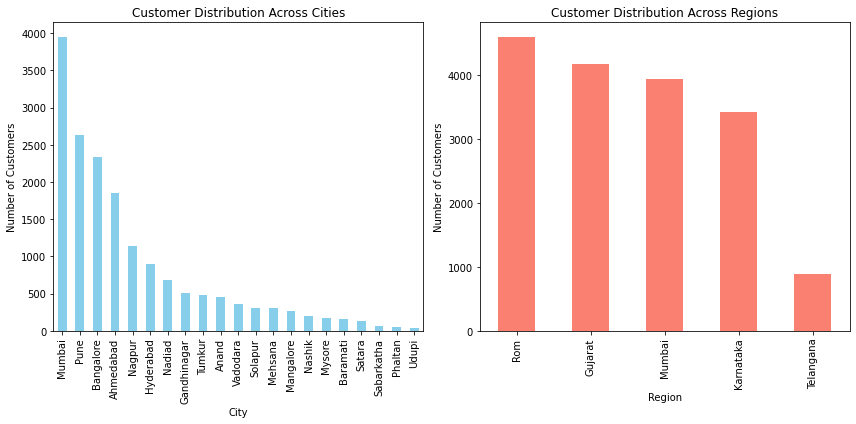

In [12]:
# Plotting the distribution of customers across cities
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
customer_distribution_city.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')

# Plotting the distribution of customers across regions
plt.subplot(1, 2, 2)
customer_distribution_region.plot(kind='bar', color='salmon')
plt.title('Customer Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

**Q3. Are there any cities with a significantly higher number of loans?**

In [14]:
# Calculate the number of loans per city
loans_per_city = df['city'].value_counts()

# Calculate the number of loans per region
loans_per_region = df['region'].value_counts()

# Identify cities with a significantly higher number of loans
significant_cities = loans_per_city[loans_per_city > loans_per_city.mean() + loans_per_city.std()]

# Display the results
print("Cities with a significantly higher number of loans:")
print(significant_cities)

Cities with a significantly higher number of loans:
Mumbai       3948
Pune         2629
Bangalore    2333
Ahmedabad    1855
Name: city, dtype: int64


**Q4. What is the average rate of interest (ROI) across different regions and cities?**

In [15]:
# Calculate the average ROI per city
average_roi_city = df.groupby('city')['roi'].mean()

# Calculate the average ROI per region
average_roi_region = df.groupby('region')['roi'].mean()

# Display the results
print("Average ROI Across Cities:")
print(average_roi_city)

print("\nAverage ROI Across Regions:")
print(average_roi_region)

Average ROI Across Cities:
city
Ahmedabad      11.721240
Anand          11.826630
Bangalore      11.640163
Baramati       12.409390
Gandhinagar    11.496542
Hyderabad      12.035355
Mangalore      13.798577
Mehsana        11.567067
Mumbai         11.446960
Mysore         11.468652
Nadiad         11.243566
Nagpur         11.021967
Nashik         10.822487
Phaltan        12.274727
Pune           12.656953
Sabarkatha     12.862857
Satara         12.331587
Solapur        11.753148
Tumkur         11.599569
Udupi          12.446857
Vadodara       11.646694
Name: roi, dtype: float64

Average ROI Across Regions:
region
Gujarat      11.629354
Karnataka    11.801221
Mumbai       11.444774
Rom          12.096443
Telangana    12.035709
Name: roi, dtype: float64


**Q5. How does the loan tenure vary across different regions and cities?**

In [18]:
# Calculate the average loan tenure for each city
average_tenure_per_city = df.groupby('city')['tenure'].mean()

# Calculate the average loan tenure for each region
average_tenure_per_region = df.groupby('region')['tenure'].mean()

# Display the results
print("Average Loan Tenure Across Cities:")
print(average_tenure_per_city)

print("\nAverage Loan Tenure Across Regions:")
print(average_tenure_per_region)

Average Loan Tenure Across Cities:
city
Ahmedabad      26.400539
Anand          31.480435
Bangalore      27.117017
Baramati       27.292683
Gandhinagar    29.306324
Hyderabad      26.021064
Mangalore      33.096154
Mehsana        29.306667
Mumbai         27.479483
Mysore         31.348315
Nadiad         29.200873
Nagpur         28.547849
Nashik         28.279793
Phaltan        27.054545
Pune           27.793077
Sabarkatha     31.428571
Satara         29.825397
Solapur        30.373770
Tumkur         25.425051
Udupi          33.657143
Vadodara       24.674863
Name: tenure, dtype: float64

Average Loan Tenure Across Regions:
region
Gujarat      27.878781
Karnataka    27.645388
Mumbai       27.480681
Rom          28.204010
Telangana    26.036872
Name: tenure, dtype: float64


**Q6. Which dealers have the highest number of loans processed?**

In [19]:
# Count the number of loans processed by each dealer
dealer_loan_counts = df['dealer'].value_counts()

# Identify dealers with the highest number of loans processed
top_dealers = dealer_loan_counts.head(10)  # Adjust the number to get top 'n' dealers

# Display the results
print("Dealers with the Highest Number of Loans Processed:")
print(top_dealers)

Dealers with the Highest Number of Loans Processed:
Car Trust Connect            629
Velocity Equity Mart         482
salman s i                   339
Prime Trust Lending          278
salman s n                   264
Supreme Drive Group          237
Prime Speed Solutions        221
omkar C i                    207
salman h F                   185
Velocity Pavement Connect    185
Name: dealer, dtype: int64


**Q7. Find out the distribution of total loan amounts across different regions?**

In [29]:
# Filter entries for Karnataka region and sum the loan amounts
total_loan_amount_karnataka = df[df['region'] == 'Karnataka']['loan_amt'].sum()

print("Total Loan Amount in Karnataka:", total_loan_amount_karnataka)

Total Loan Amount in Karnataka: 275296576


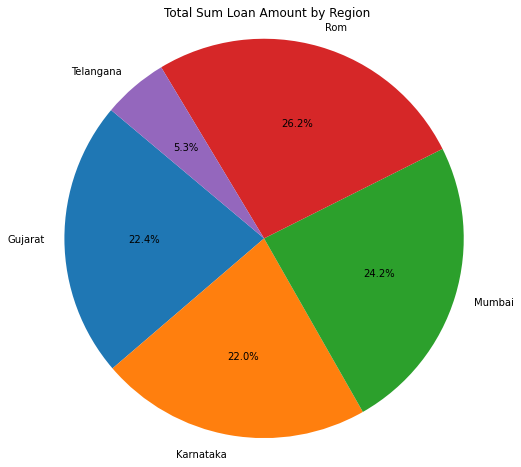

In [21]:
# Calculate total sum loan amount by region
loan_amount_by_region = df.groupby('region')['loan_amt'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_amount_by_region, labels=loan_amount_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sum Loan Amount by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [28]:
# Calculate total loan amount
total_loan_amount = df['loan_amt'].sum()

# Calculate distribution of total loan amounts across different regions
loan_amount_by_region = df.groupby('region')['loan_amt'].sum().reset_index()

# Calculate percentage of total loan amount for each region
loan_amount_by_region['loan_amt_percent'] = loan_amount_by_region['loan_amt'] / total_loan_amount * 100

# Plotting pie chart with percentages using Plotly
fig = px.pie(loan_amount_by_region, values='loan_amt', names='region', title='Distribution of Total Loan Amounts Across Different Regions')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

print("Total Loan Amount:", total_loan_amount)

Total Loan Amount: 1253755964


**Q8. Number Of Customers And Average Loan Amount By Sales Manager**

In [24]:
# Group by sales manager and calculate number of customers and average loan amount
sales_manager_summary = df.groupby('sales_manager').agg({'customer': 'count', 'loan_amt': 'mean'})

print("Number of Customers and Average Loan Amount by Sales Manager:")
print(sales_manager_summary)

Number of Customers and Average Loan Amount by Sales Manager:
                 customer      loan_amt
sales_manager                          
Aarav Sharma          237  73657.118143
Aditya Shah           478  66808.910042
Ajay Singh            162  70510.080247
Ananya Gupta          294  67090.996599
Anjali Desai          167  73089.574850
Ankit Kapoor            1  77902.000000
Arjun Kapoor          162  66801.753086
Arvind Desai           58  82882.241379
Ayesha Khan           278  73835.007194
Deepak Patel          427  71735.742389
Divya Malhotra        137  72265.970803
Karan Singh            15  59356.666667
Kavita Reddy          310  67440.122581
Kritika Singh           2  65229.500000
Manoj Kumar             2  77000.000000
Maya Verma             98  75861.051020
Natasha Singh           1  58000.000000
Neha Gupta            265  68806.532075
Nisha Verma            72  73927.652778
Pooja Malhotra        274  69315.627737
Poonam Shah            46  79541.500000
Pradeep Patel     

**Q9. What are the total sales, total number of customers, total number of sales manager, and total number of dealers in our dataset?**

In [32]:
# Calculate total sales
total_sales = df['loan_amt'].sum()

# Calculate total number of customers
total_customers = df['customer'].nunique()

# Calculate total number of dealers
total_dealers = df['dealer'].nunique()

# Calculate total number of sales managers
total_sales_managers = df['sales_manager'].nunique()

print("Total Sales:", total_sales)
print("Total Number of Customers:", total_customers)
print("Total Number of Dealers:", total_dealers)
print("Total Number of Sales Managers:", total_sales_managers)

Total Sales: 1253755964
Total Number of Customers: 9765
Total Number of Dealers: 691
Total Number of Sales Managers: 40


**Q10. Top 10 Sales Manager by loan amount, by Sales Rep and by Dealer.**

In [33]:
# Top 10 Sales Managers by loan amount
top_sales_managers_loan_amount = df.groupby('sales_manager')['loan_amt'].sum().nlargest(10)

# Top 10 Sales Reps by loan amount
top_sales_reps_loan_amount = df.groupby('sales_rep')['loan_amt'].sum().nlargest(10)

# Top 10 Dealers by loan amount
top_dealers_loan_amount = df.groupby('dealer')['loan_amt'].sum().nlargest(10)

print("Top 10 Sales Managers by Loan Amount:")
print(top_sales_managers_loan_amount)
print("\nTop 10 Sales Reps by Loan Amount:")
print(top_sales_reps_loan_amount)
print("\nTop 10 Dealers by Loan Amount:")
print(top_dealers_loan_amount)

Top 10 Sales Managers by Loan Amount:
sales_manager
Rakesh Kumar    765699029
Vikram Singh     46436452
Sameer Desai     40904412
Priya Patel      35429170
Rohit Reddy      32119758
Aditya Shah      31934659
Deepak Patel     30631162
Rohan Mehta      26105323
Kavita Reddy     20906438
Ayesha Khan      20526132
Name: loan_amt, dtype: int64

Top 10 Sales Reps by Loan Amount:
sales_rep
Trisha Rao        659555894
Aditya Kapoor       8461431
Esha Reddy          8389790
Vedant Iyengar      8144051
Eesha Reddy         7567985
Zara Chawla         7238622
Laksh Gupta         6726685
Meher Patel         6602851
Falguni Reddy       6285000
Shiv Sharma         5694402
Name: loan_amt, dtype: int64

Top 10 Dealers by Loan Amount:
dealer
Car Trust Connect        47853041
Velocity Equity Mart     34583757
salman s i               22153645
salman s n               18880885
Prime Trust Lending      18847892
Liberty Drive            16049245
Supreme Drive Group      15049136
Drive Advance Mart       143

**Q11. Number Of Customer By Region For Rakesh Kumar**

In [54]:
# Filter DataFrame for customers managed by Rakesh Kumar
df_rakesh_kumar = df[df['sales_manager'] == 'Rakesh Kumar']

# Group by region and count number of customers
customer_by_region = df_rakesh_kumar.groupby('region')['customer'].count().reset_index()

print(customer_by_region)

      region  customer
0    Gujarat      2175
1  Karnataka      2369
2     Mumbai      2460
3        Rom      2594
4  Telangana       577


In [59]:
# Filter DataFrame for customers managed by Rakesh Kumar
df_rakesh_kumar = df[df['sales_manager'] == 'Rakesh Kumar']

# Group by region and count number of customers
customer_by_region = df_rakesh_kumar.groupby('region')['customer'].count().reset_index()

# Create bar chart using Plotly Express
fig = px.bar(customer_by_region, x='region', y='customer',
             labels={'customer': 'Number of Customers', 'region': 'Region'},
             title='Number of Customers by Region for Rakesh Kumar')
fig.show()

**Q12. Total Disbursement Amount by Dealer**

In [55]:
# Group by dealer and calculate total disbursement amount
total_disbursement_by_dealer = df.groupby('dealer')['disb_amount'].sum().reset_index()

print(total_disbursement_by_dealer)

              dealer  disb_amount
0         Alpha Auto      3596832
1       Alpha Motors       498910
2          Apex Auto       169880
3    Apex Auto Group       120630
4    Apex Automotive       479340
..               ...          ...
686     shahrukh h F      3206300
687     shahrukh h c       251520
688     shahrukh h i        67640
689     shahrukh h n      2798810
690     shahrukh s i       701430

[691 rows x 2 columns]


In [57]:
# Group by dealer and calculate total disbursement amount
total_disbursement_by_dealer = df.groupby('dealer')['disb_amount'].sum().nlargest(10).reset_index()

# Create bar chart using Plotly Express
fig = px.bar(total_disbursement_by_dealer, y='dealer', x='disb_amount',
             labels={'disb_amount': 'Total Disbursement Amount', 'dealer': 'Dealer'},
             title='Top 10 Dealers by Total Disbursement Amount')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

### Outcomes

1. The workforce comprises 40 Sales Managers, 490 Sales Representatives, and 691 Dealers, reaching 16,998 customers, indicating a broad national coverage that should be analyzed against the total loan amount disbursed for productivity insights.

2. An analysis on the average loan amount and customer conversions per sales manager is needed, with a focus on Rakesh Kumar's exceptional performance compared to others for potential improvement areas.

3. Identifying the top 10 sales managers by loan amount and their team's composition (Sales Reps and Dealers) will highlight the key performers and their strategies.

4. Rakesh Kumar stands out for operating across all regions and achieving exceptional performance metrics, suggesting his methods could offer valuable insights for the entire sales team.

**Conclusion:**

> In conclusion, understanding the factors behind Rakesh Kumar's outstanding performance, alongside the strategic distribution of the sales force and their effectiveness in loan disbursement, can provide a blueprint for replicating success across the organization. By aligning workforce distribution strategies with proven high-performance models, the company can optimize its sales operations to enhance productivity and increase the total loan amount disbursed.